In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("C:\\Users\\DELL\\Desktop\\ml project\\car data.csv")

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       302 non-null    object 
 1   Year           302 non-null    int64  
 2   Selling_Price  302 non-null    float64
 3   Present_Price  302 non-null    float64
 4   Kms_Driven     302 non-null    int64  
 5   Fuel_Type      302 non-null    object 
 6   Seller_Type    302 non-null    object 
 7   Transmission   302 non-null    object 
 8   Owner          302 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.4+ KB


In [84]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0
301,city,2017,11.30,12.0,34223,0,0,0,0


In [86]:
car_dataset.shape

(302, 9)

In [88]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,2013.639073,4.683278,7.642947,36938.185430,0.211921,0.350993,0.132450,0.043046
std,2.893261,5.088721,8.633410,38822.550479,0.425269,0.478073,0.339542,0.247515
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.215000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.625000,6.445000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48575.250000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [59]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [61]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

0    240
1     60
2      2
Name: Fuel_Type, dtype: int64
0    196
1    106
Name: Seller_Type, dtype: int64
0    262
1     40
Name: Transmission, dtype: int64


### Encoding the Categorical Data

In [62]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [63]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the Data and Target

In [64]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [65]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   
301  2017          12.00       34223          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [66]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
297     4.00
298     3.35
299    11.50
300     5.30
301    11.30
Name: Selling_Price, Length: 302, dtype: float64


### Splitting Training and Test Data

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Model Training using Linear Regression

In [68]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [69]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [70]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [71]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8807061647648797


### Visualize the Actual Prices and Predicted Prices

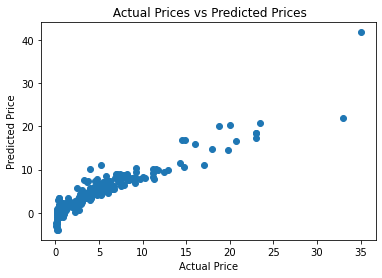

In [72]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [73]:
# prediction on Testdata
test_data_prediction = lin_reg_model.predict(X_test)

In [74]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7857124037681313


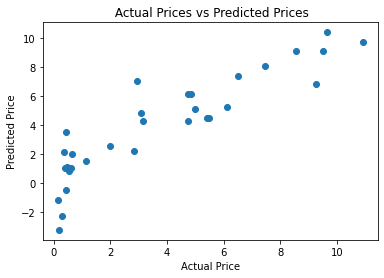

In [75]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Model Training using Lasso Regression

In [76]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [77]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

### Model Evaluation

In [78]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [79]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8420966531140314


### Visualize the Actual Prices and Predicted Prices

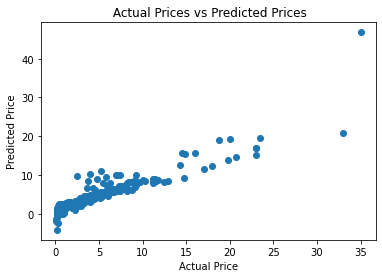

In [80]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [81]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [82]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8775804978309805


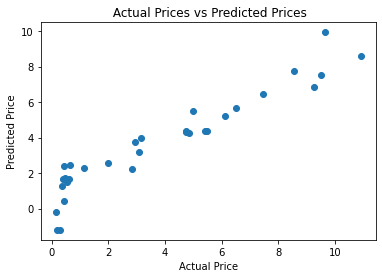

In [83]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()